# Comparison of Four Geocoders:<br> They return different geolocation coordinates for the same place
____

[GitHub](https://github.com/CatChenal/Geocoders_Comparison)

In [1]:
%matplotlib inline

In [2]:
import GeocodersComparison as GeoComp4


Fetching API keys from environment file if found.

GOOGLE_KEY & AZURE_KEY successfully assigned from envir. file.

Geocoders in use, var geocs: ['Nominatim', 'GoogleV3', 'ArcGis', 'AzureMaps']

Places queried, var query_lst: ['New York City, NY, USA', "Cleopatra's needle, Central Park, New York, NY, USA", 'Bronx county, NY, USA', 'Kings county, NY, USA', 'New York county, NY, USA', 'Queens county, NY, USA', 'Richmond county, NY, USA', 'Boston, MA, USA']

Fetching geodata...
Found locale file: ./geodata/geodata_Nom.json, 6h 58m 54s old
Found locale file: ./geodata/geodata_Goo.json, 6h 58m 49s old
Found locale file: ./geodata/geodata_Arc.json, 6h 58m 44s old
Found locale file: ./geodata/geodata_Azu.json, 6h 58m 42s old

All geodata variables gathered into list geo_dicts.

The var places will be used for retrieving the geodata and the distance comparison for a particular place:
 ['New York City', "Cleopatra's needle", 'Bronx county', 'Kings county', 'New York county', 'Queens county', 'R

# Geolocation parameters and data:

### 1. Full query strings of the locations that are passed to all geocoders in the comparison:

In [3]:
query_lst = GeoComp4.query_lst
query_lst

['New York City, NY, USA',
 "Cleopatra's needle, Central Park, New York, NY, USA",
 'Bronx county, NY, USA',
 'Kings county, NY, USA',
 'New York county, NY, USA',
 'Queens county, NY, USA',
 'Richmond county, NY, USA',
 'Boston, MA, USA']

### 2. Geocoders in the comparison:

In [4]:
geocs = GeoComp4.geocs
geocs

['Nominatim', 'GoogleV3', 'ArcGis', 'AzureMaps']

### 3. Places in the query list (they are the keys of the geo dicts), used for accessing data for a particular place:

In [5]:
places = GeoComp4.places
places 

['New York City',
 "Cleopatra's needle",
 'Bronx county',
 'Kings county',
 'New York county',
 'Queens county',
 'Richmond county',
 'Boston']

### 4. Saved geolocation data for each geocoder are in __geo_Nom__, __geo_Goo__, __geo_Arc__, __geo_Azu__.<br>They are combined into a list named __geo_dicts__ to pass to functions.

In [6]:
geo_dicts = GeoComp4.geo_dicts
colors_dict = GeoComp4.colors_dict

#### Output example: data from Nominatim, the search engine of OpenStreetMap:

In [7]:
geo_Nom = GeoComp4.geo_Nom
geo_Nom['New York City']

{'box': [[40.9161785, -73.7001809], [40.477399, -74.25909]],
 'loc': [40.7308619, -73.9871558]}

# Quantitative comparison: pairwise difference of the geo coordinates in geodesic distance:

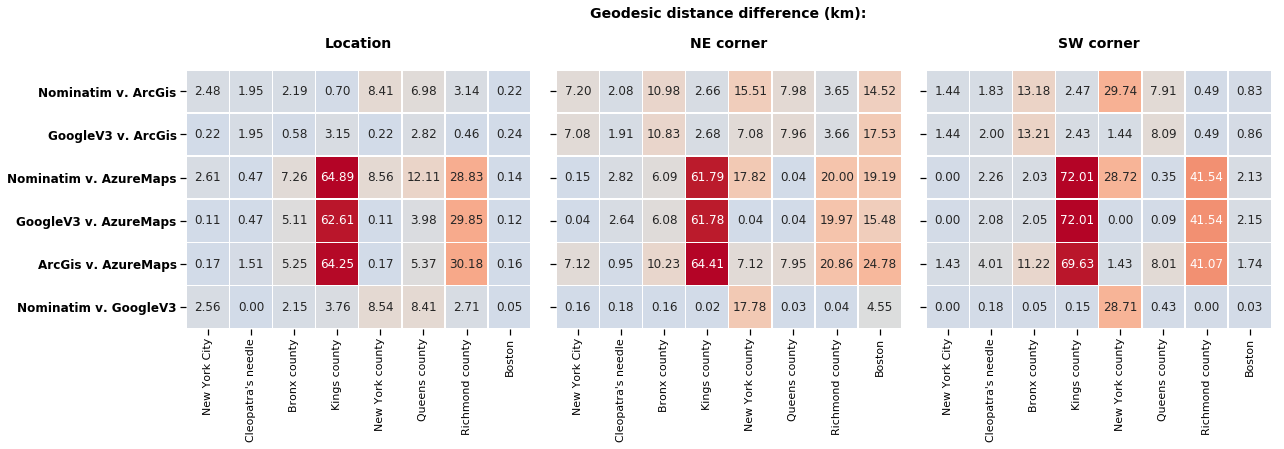

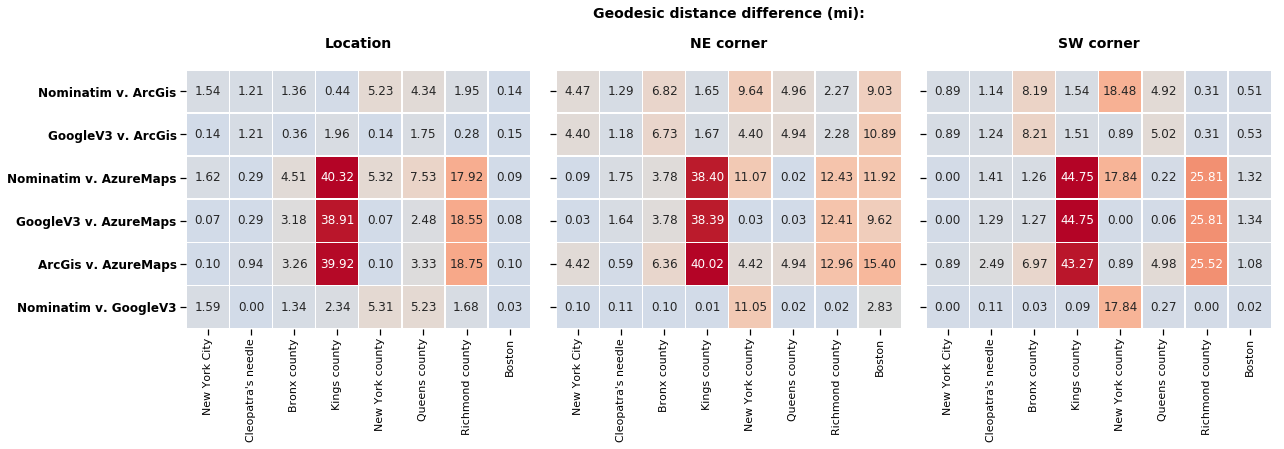

In [8]:
# Distance in kilometers
GeoComp4.get_geo_dist_heatmap(places)

# Distance in miles:
GeoComp4.get_geo_dist_heatmap(places, unit='mi')

In [9]:
GeoComp4.compare_location_with_geobox(places, geocs, geo_dicts)

,Nominatim,GoogleV3,ArcGis,AzureMaps
Location is box center?,,,,
New York City,False,False,True,False
Cleopatra's needle,True,True,True,False
Bronx county,True,False,True,False
Kings county,False,False,True,False
New York county,False,False,True,False
Queens county,False,False,True,False
Richmond county,False,False,True,False
Boston,False,False,True,False


# Mappings of the geo coordinates

# NYC data

In [11]:
nyc_df, dist_nyc_df = GeoComp4.show_data(geocs, geo_dicts, places[0])

,"lat, lon",NE,SW
New York City,,,
Nominatim,"[40.7308619, -73.9871558]","[40.9161785, -73.7001809]","[40.477399, -74.25909]"
GoogleV3,"[40.7127753, -74.0059728]","[40.9175771, -73.70027209999999]","[40.4773991, -74.25908989999999]"
ArcGis,"[40.71455000000003, -74.00713999999994]","[40.96455000000003, -73.75713999999994]","[40.46455000000003, -74.25713999999994]"
AzureMaps,"[40.71305, -74.00723]","[40.9175, -73.69979]","[40.47738, -74.25909]"


## NYC lat/lon: 'New York City' = Lower Manahattan???
GoogleV3, ArcGis and AzureMaps return locations near the Municipal Building in Lower Manhattan; I was expecting the center of the bounding box.
Nominatim returns a location on 2nd Avenue: odd.

In [12]:
GeoComp4.map_geos(nyc_df, colors_dict)

## NYC boundaries:

In [13]:
GeoComp4.map_geos(nyc_df, colors_dict, geo_type='box', zoom=10)

## The coordinates of the Egyptian obelisk in Central Park: ArcGis and AzureMaps, please come see Cleo up close!

While all locations are in Central Park, only Nominatim and GoogleV3 are on target.
It appears that AzureMaps returns the center of the box enclosing Central Park (see next map), while ArcGis got lost...

In [14]:
cleo_df, dist_cleo_df = GeoComp4.show_data(geocs, geo_dicts, places[1])

,"lat, lon",NE,SW
Cleopatra's needle,,,
Nominatim,"[40.77963585, -73.96539645]","[40.779683, -73.96533289999999]","[40.7795887, -73.96546]"
GoogleV3,"[40.7796358, -73.9653964]","[40.7809847802915, -73.9640474197085]","[40.77828681970851, -73.96674538029151]"
ArcGis,"[40.7964784531607, -73.95881019345023]","[40.7974784531607, -73.95781019345023]","[40.795478453160705, -73.95981019345024]"
AzureMaps,"[40.78384, -73.96555]","[40.80124, -73.94765]","[40.76359, -73.98207]"


In [15]:
GeoComp4.map_geos(cleo_df, colors_dict)

## The bounding box of the Egyptian obelisk in Central Park: Kudos Nominatim!!
Nominatim's box is the actual obelisk perimeter: impressive!
...For AzureMaps it's Central Park, not formally wrong, but way off the mark.

In [16]:
GeoComp4.map_geos(cleo_df, colors_dict, geo_type='box', zoom=14)

## NYC counties boundaries:

## Bronx:
Nominatim and GoogleV3 agree (and are the most sensible);
ArcGis is way off.

In [17]:
bx_df, dist_bx_df = GeoComp4.show_data(geocs, geo_dicts, places[2])

,"lat, lon",NE,SW
Bronx county,,,
Nominatim,"[40.85048545, -73.8404035580209]","[40.9161785, -73.74806]","[40.7853322, -73.9336575]"
GoogleV3,"[40.8447819, -73.8648268]","[40.9175771, -73.74806]","[40.7857429, -73.933808]"
ArcGis,"[40.84985000000006, -73.86640999999997]","[41.00985000000006, -73.70640999999998]","[40.689850000000064, -74.02640999999997]"
AzureMaps,"[40.82615, -73.92027]","[40.92067, -73.676]","[40.77356, -73.95203]"


In [18]:
GeoComp4.map_geos(bx_df, colors_dict, zoom=13)

In [19]:
GeoComp4.map_geos(bx_df, colors_dict, geo_type='box', zoom=11)

## Brooklyn, Kings county: AzureMaps coordinates place it over 50 miles away in Long Island

In [20]:
bk_df, dist_bk_df = GeoComp4.show_data(geocs, geo_dicts, places[3])

,"lat, lon",NE,SW
Kings county,,,
Nominatim,"[40.64530975, -73.9550230275334]","[40.7394026, -73.8335645]","[40.5498513, -74.0558455]"
GoogleV3,"[40.6781784, -73.9441579]","[40.739446, -73.8333651]","[40.551042, -74.05663]"
ArcGis,"[40.650100000000066, -73.94957999999997]","[40.73510000000007, -73.86457999999998]","[40.565100000000065, -74.03457999999996]"
AzureMaps,"[40.88435, -73.25377]","[40.93805, -73.14917]","[40.84964, -73.30029]"


In [21]:
GeoComp4.map_geos(bk_df, colors_dict, zoom=10)

In [22]:
GeoComp4.map_geos(bk_df, colors_dict, geo_type='box', zoom=10)

## Mahattan, New York county

In [23]:
ny_df, dist_ny_df = GeoComp4.show_data(geocs, geo_dicts, places[4])

,"lat, lon",NE,SW
New York county,,,
Nominatim,"[40.7810178, -73.959299675]","[40.882463, -73.9061585]","[40.6793188, -74.0472251]"
GoogleV3,"[40.7127753, -74.0059728]","[40.9175771, -73.70027209999999]","[40.4773991, -74.25908989999999]"
ArcGis,"[40.71455000000003, -74.00713999999994]","[40.96455000000003, -73.75713999999994]","[40.46455000000003, -74.25713999999994]"
AzureMaps,"[40.71305, -74.00723]","[40.9175, -73.69979]","[40.47738, -74.25909]"


### For Nominatim, the seat of New York county is the Metropolitan Museum of Art, high-minded location, indeed!
### The visualization of the bounding boxes (next), shows that the Nominatim location is the center of the bounding box.

In [24]:
GeoComp4.map_geos(ny_df, colors_dict, zoom=12)

In [25]:
GeoComp4.map_geos(ny_df, colors_dict, geo_type='box', zoom=10)

# Let's compare the bounding box of New York City with that of New York county as these appear to be identical for several geocoders:

In [26]:
GeoComp4.compare_two_geoboxes(places[0], places[4], geocs, geo_dicts)

,Identical
,bounding boxes?
New York City & New York county:,
Nominatim,False
GoogleV3,True
ArcGis,True
AzureMaps,True


## Queens

In [27]:
qn_df, dist_qn_df  = GeoComp4.show_data(geocs, geo_dicts, places[5])

,"lat, lon",NE,SW
Queens county,,,
Nominatim,"[40.6524927, -73.7914214158161]","[40.8119497, -73.7001809]","[40.4932114, -74.0444159]"
GoogleV3,"[40.7282239, -73.7948516]","[40.8122421, -73.70027209999999]","[40.4897939, -74.0421119]"
ArcGis,"[40.71150274800004, -73.81994085999997]","[40.875502748000045, -73.65594085999997]","[40.54750274800004, -73.98394085999998]"
AzureMaps,"[40.75978, -73.8173]","[40.81214, -73.69979]","[40.49063, -74.04208]"


In [28]:
GeoComp4.map_geos(qn_df, colors_dict, zoom=12)

## ArcGis includes a portion of Nassau county - due to outdated shapefiles, perhaps - and is also missing the maritime portion of the county.
## The other geocoders cover Queens county's weird shape - due to the Far Rockaway peninsula - adequately.

In [29]:
GeoComp4.map_geos(qn_df, colors_dict, geo_type='box', zoom=11)

## Staten Island; Richmond county. AzureMaps, hello?

In [30]:
si_df, dist_si_df = GeoComp4.show_data(geocs, geo_dicts, places[6])

,"lat, lon",NE,SW
Richmond county,,,
Nominatim,"[40.564209, -74.1253046199539]","[40.651812, -74.0349887]","[40.477399, -74.25909]"
GoogleV3,"[40.5795317, -74.1502007]","[40.6518121, -74.0345471]","[40.4773991, -74.25908989999999]"
ArcGis,"[40.580769935000035, -74.15532721799997]","[40.680769935000036, -74.05532721799997]","[40.48076993500003, -74.25532721799996]"
AzureMaps,"[40.6997, -73.83455]","[40.71194, -73.81194]","[40.68526, -73.85111]"


In [31]:
GeoComp4.map_geos(si_df, colors_dict, zoom=11)

In [32]:
GeoComp4.map_geos(si_df, colors_dict, geo_type='box', zoom=11)

# Boston lat/lon: same as with New York City: downtown

In [33]:
boston_df, dist_boston_df = GeoComp4.show_data(geocs, geo_dicts, places[7])

,"lat, lon",NE,SW
Boston,,,
Nominatim,"[42.3602534, -71.0582912]","[42.3969775, -70.8044881]","[42.227654, -71.19126]"
GoogleV3,"[42.3600825, -71.0588801]","[42.40081989999999, -70.749455]","[42.22788, -71.191113]"
ArcGis,"[42.35866000000004, -71.05673999999993]","[42.49666000000004, -70.91873999999993]","[42.220660000000045, -71.19473999999994]"
AzureMaps,"[42.35899, -71.05863]","[42.5001, -70.61734]","[42.22157, -71.21573]"


In [34]:
GeoComp4.map_geos(boston_df, colors_dict)

## Boston boundaries: not clear whether Nominatim is better than GoogleV3.
### AzureMaps box covers more water than land.

In [35]:
GeoComp4.map_geos(boston_df, colors_dict, geo_type='box', zoom=11)

___
# Finally, here is something else I learned: 
# How to estimate the resolution distance using the decimal portion of a decimal degree

#### Note: this is always going to be an estimate because of this simplification: 
> meters per degree of latitude = meters per degree of longitude

#### Hence, this is an "eyeball" estimate.

* See this excellent resource on precision for geolocations:
    https://gis.stackexchange.com/questions/8650/measuring-accuracy-of-latitude-and-longitude

**Excerpts from Whuber**:
>. The first decimal place is worth up to 11.1 km: it can distinguish the position of one large city from a neighboring large city.<br>
>. The second decimal place is worth up to 1.1 km: it can separate one village from the next.<br>
>. The third decimal place is worth up to 110 m: it can identify a large agricultural field or institutional campus.<br>
. The fourth decimal place is worth up to 11 m: it can identify a parcel of land. It is comparable to the typical accuracy of an uncorrected GPS unit with no interference.<br>
. The fifth decimal place is worth up to 1.1 m: it distinguish trees from each other. Accuracy to this level with commercial GPS units can only be achieved with differential correction.<br>
. The sixth decimal place is worth up to 0.11 m: you can use this for laying out structures in detail, for designing landscapes, building roads. It should be more than good enough for tracking movements of glaciers and rivers. This can be achieved by taking painstaking measures with GPS, such as differentially corrected GPS.<br>
. The seventh decimal place is worth up to 11 mm: this is good for much surveying and is near the limit of what GPS-based techniques can achieve.<br>
. The eighth decimal place is worth up to 1.1 mm: this is good for charting motions of tectonic plates and movements of volcanoes. Permanent, corrected, constantly-running GPS base stations might be able to achieve this level of accuracy.<br>
. The ninth decimal place is worth up to 110 microns: we are getting into the range of microscopy. For almost any conceivable application with earth positions, this is overkill and will be more precise than the accuracy of any surveying device.<br>
. Ten or more decimal places indicates a computer or calculator was used and that no attention was paid to the fact that the extra decimals are useless. Be careful, because unless you are the one reading these numbers off the device, this can indicate low quality processing!

# Call for additional comparisons: it would be nice to have a complete set!
### At the time of this writing, there are (only) 47 geocoding services listed in geopy:

In [36]:
import geopy.geocoders

geocoders_in_geopy = [g for g in dir(geopy.geocoders) if not g.startswith('_')]
print('Total:', len(geocoders_in_geopy))

#geocoders_in_geopy
pairwise_comparison_names = GeoComp4.get_paiwise_names(geocoders_in_geopy)
print('Number of pairwise comparisons:', len(pairwise_comparison_names))

Total: 47
Number of pairwise comparisons: 1081
